# Results overview

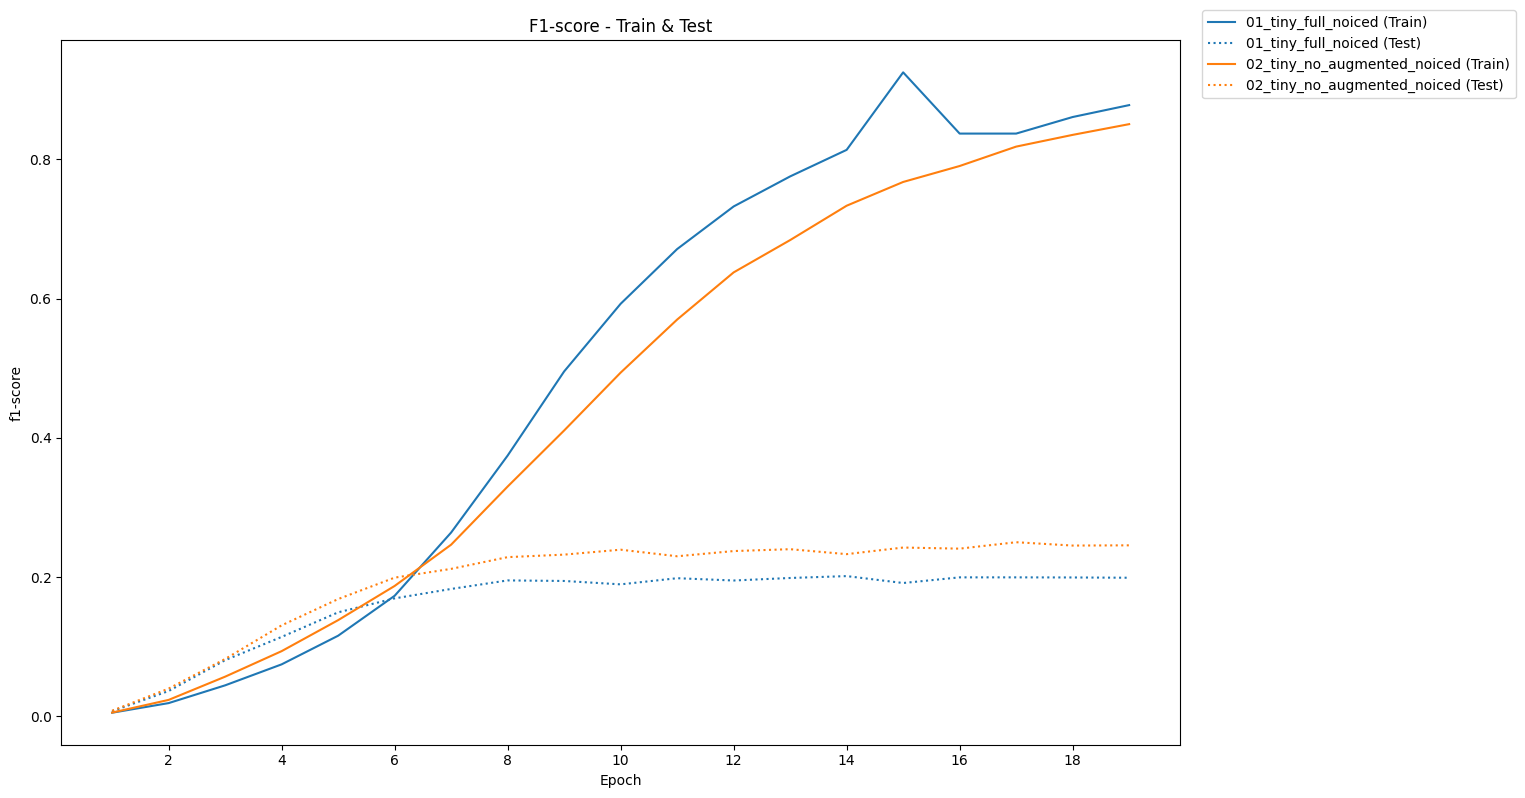

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

folder_path = "/home/maiko/Documents/HSLU/DSPRO1/HSLU.DSPRO1.BirdDetection/notebooks/bird_whisperer/experiments/results"
metrics = ["f1-score"]
results = {}

for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, "r") as f:
            data = json.load(f)
        
        model_name = os.path.splitext(filename)[0]
        results[model_name] = {"train": {}, "test": {}}
        
        train_data = data.get("train_metrics", [])
        test_data = data.get("test_metrics", [])
        
        for m in metrics:
            results[model_name]["train"][m] = [epoch_data[m] for epoch_data in train_data if m in epoch_data]
            results[model_name]["test"][m] = [epoch_data[m] for epoch_data in test_data if m in epoch_data]

model_names = list(results.keys())

min_train_length = min(len(results[mn]["train"][metrics[0]]) for mn in model_names)
min_test_length = min(len(results[mn]["test"][metrics[0]]) for mn in model_names)
num_epochs = min(min_train_length, min_test_length)
epochs = range(1, num_epochs + 1)

fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(12, 8))
if len(metrics) == 1:
    axes = [axes]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, m in enumerate(metrics):
    ax = axes[i]
    for idx, model_name in enumerate(model_names):
        color = colors[idx % len(colors)]
        
        train_values = results[model_name]["train"][m][:num_epochs]
        ax.plot(epochs, train_values, label=f"{model_name} (Train)", color=color, linestyle='-')
        
        test_values = results[model_name]["test"][m][:num_epochs]
        ax.plot(epochs, test_values, label=f"{model_name} (Test)", color=color, linestyle=':')
    
    ax.set_title(f"{m.capitalize()} - Train & Test")
    ax.set_xlabel("Epoch")
    ax.set_ylabel(m)
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
